# Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sn
from statsmodels.formula.api import ols

# Prep Data

In [2]:
# import data into local dataframes 
filepath = '../data/data-case.xlsx'
df_users = pd.read_excel(filepath, sheet_name='users')
df_nps = pd.read_excel(filepath, sheet_name='nps')
df_appts = pd.read_excel(filepath, sheet_name='appointments')

# visualize dataframes
df_users.head()

# uncomment and run last to visualize
# df_nps.head()
# df_appts.head()

,user_id,gender,birth_date,start_date,end_date,city_code
0,1,female,1981-07-07,2010-06-29,2010-11-02,3
1,2,male,1996-10-08,2011-01-18,2012-02-18,1
2,3,female,1986-06-03,2010-01-13,2010-09-12,3
3,4,male,1992-07-28,2010-11-19,2012-08-01,3
4,5,male,1981-04-21,2011-08-27,2011-12-11,2


In [3]:
""" Extend `df_users` by adding the total number days a user has been a client.
    This is the variable we care about. 
    
    num_days = end_date - start_date, end date inclusive
"""
df_users['num_days'] = df_users['end_date'] - df_users['start_date']
df_users['num_days'] = df_users['num_days'].dt.days
df_users.head()

,user_id,gender,birth_date,start_date,end_date,city_code,num_days
0,1,female,1981-07-07,2010-06-29,2010-11-02,3,126
1,2,male,1996-10-08,2011-01-18,2012-02-18,1,396
2,3,female,1986-06-03,2010-01-13,2010-09-12,3,242
3,4,male,1992-07-28,2010-11-19,2012-08-01,3,621
4,5,male,1981-04-21,2011-08-27,2011-12-11,2,106


Text(0.5, 1.0, 'Distribution of days over the entire dataset')

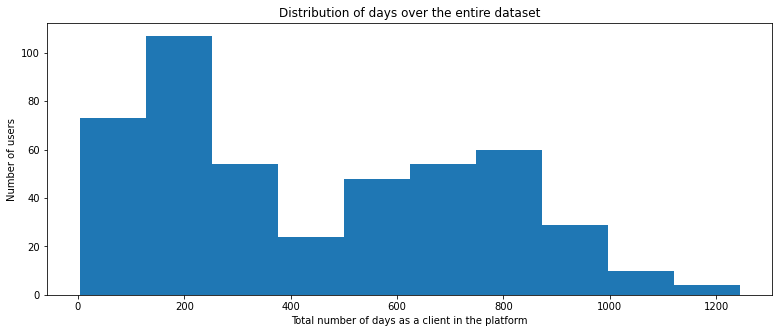

In [4]:
# Visualize distribution of days spent in the platform
plt.figure(figsize=(13,5))
ax = df_users['num_days'].plot.hist()

# Set common labels
ax.set_xlabel('Total number of days as a client in the platform')
ax.set_ylabel('Number of users')
ax.set_title('Distribution of days over the entire dataset')

# Data study
## Distribution of number of days, grouped by gender

Text(0.5, 1.0, 'Distribution of days, grouped by gender')

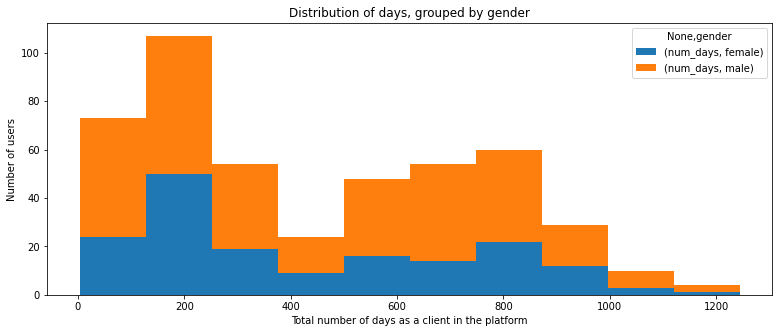

In [5]:
df = df_users.copy()
ax = df[['num_days', 'gender']].pivot(columns='gender').plot(kind='hist', stacked=True, figsize=(13,5))

# Set common labels
ax.set_xlabel('Total number of days as a client in the platform')
ax.set_ylabel('Number of users')
ax.set_title('Distribution of days, grouped by gender')

## Distribution of number of days, grouped by city code

Text(0.5, 1.0, 'Distribution of days, grouped by city')

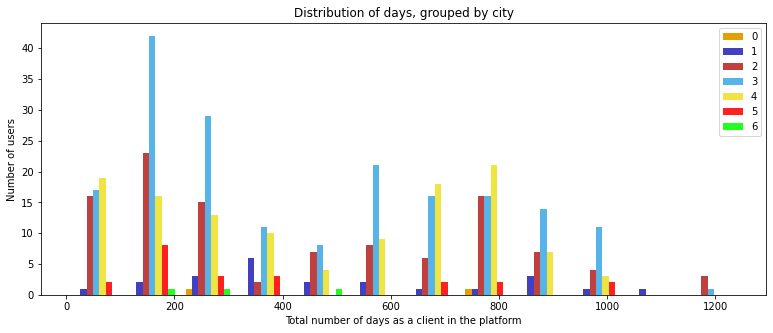

In [6]:
# Make a separate list for each 
x1 = list(df[df['city_code'] == 0]['num_days'])
x2 = list(df[df['city_code'] == 1]['num_days'])
x3 = list(df[df['city_code'] == 2]['num_days'])
x4 = list(df[df['city_code'] == 3]['num_days'])
x5 = list(df[df['city_code'] == 4]['num_days'])
x6 = list(df[df['city_code'] == 5]['num_days'])
x7 = list(df[df['city_code'] == 6]['num_days'])

# Assign colors for each airline and the names
colors = ['#E69F00','#4040C0','#C04040','#56B4E9','#F0E442','#FF2020','#20FF20']
names = ['0', '1', '2', '3', '4', '5', '6']
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.figure(figsize=(13,5))
plt.hist([x1, x2, x3, x4, x5, x6, x7], bins = int(180/15), 
         color = colors, label=names)

# Plot 
plt.legend()
plt.xlabel('Total number of days as a client in the platform')
plt.ylabel('Number of users')
plt.title('Distribution of days, grouped by city')

## Distribution of number of days, grouped by last nps

Text(0.5, 1.0, 'Distribution of days, grouped by last nps')

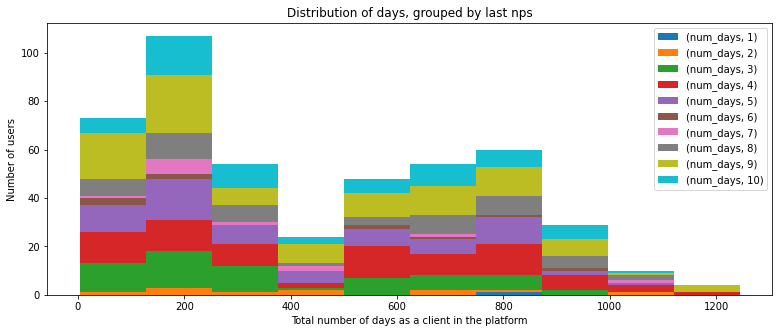

In [7]:
df['nps'] = df_nps['nps']
ax = df[['num_days', 'nps']].pivot(columns='nps').plot(kind='hist', stacked=True, figsize=(13,5))

# Plot 
plt.legend()
plt.xlabel('Total number of days as a client in the platform')
plt.ylabel('Number of users')
plt.title('Distribution of days, grouped by last nps')

## Distribution of number of days grouped by type of first appointment

In [8]:
df = df_appts.copy()
df = df[df['type'] == 'first']
df = df.reset_index()
df['num_days'] = df_users['num_days']
df.head()

,index,appt_id,user_id,appointment_date,channel,type,num_days
0,0,1,1,2010-08-10,chat,first,126
1,2,3,2,2011-06-18,presential,first,396
2,9,10,3,2010-08-12,chat,first,242
3,13,14,4,2011-11-14,chat,first,621
4,21,22,5,2011-11-10,chat,first,106


Text(0.5, 1.0, 'Distribution of days, grouped by type of first appointment')

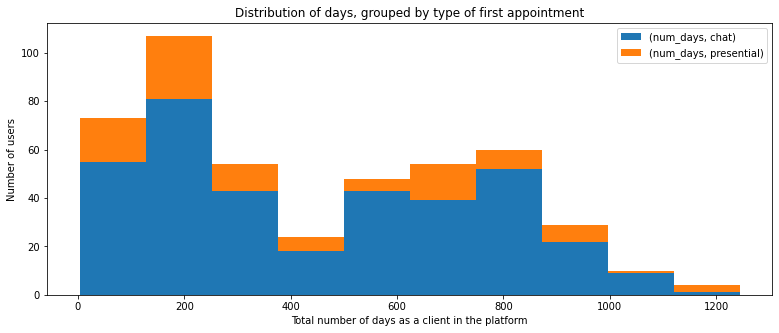

In [9]:
ax = df[['num_days', 'channel']].pivot(columns='channel').plot(kind='hist', stacked=True, figsize=(13,5))

# Plot 
plt.legend()
plt.xlabel('Total number of days as a client in the platform')
plt.ylabel('Number of users')
plt.title('Distribution of days, grouped by type of first appointment')

In [10]:
model = ols('num_days ~ C(channel)', data=df)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               num_days   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4329
Date:                Tue, 07 Apr 2020   Prob (F-statistic):              0.511
Time:                        05:17:25   Log-Likelihood:                -3302.1
No. Observations:                 463   AIC:                             6608.
Df Residuals:                     461   BIC:                             6616.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  453.4959     15.926     28.476      0.000     422.200     484.792
C(channel)[T.presential]   -22.5459     34.268     -0.658      0.511     -89.887      44.795
==============================================================================
Omnibus:                      224.537   Durbin-Watson:                   3.560
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.266
Skew:                           0.350   Prob(JB):                     2.20e-08
Kurtosis:                       1.844   Cond. No.                         2.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Distribution of number of days grouped by type of last appointment

In [11]:
df = df_appts.copy()

df.sort_values(by = ['user_id', 'appointment_date'], axis=0, ascending=True, inplace=True)

df.drop_duplicates(subset = 'user_id', keep = 'last', inplace = True)
df = df.reset_index()
df['num_days'] = df_users['num_days']

df.head()

,index,appt_id,user_id,appointment_date,channel,type,num_days
0,1,2,1,2010-10-29,chat,regular,126
1,6,7,2,2012-02-17,presential,regular,396
2,9,10,3,2010-08-12,chat,first,242
3,15,16,4,2012-07-05,chat,regular,621
4,21,22,5,2011-11-10,chat,first,106


### Study of the percentual of errors in the dataset

In [12]:
df[df['type'] == 'first'].count()

index               151
appt_id             151
user_id             151
appointment_date    151
channel             151
type                151
num_days            151
dtype: int64

In [13]:
df.count()

index               463
appt_id             463
user_id             463
appointment_date    463
channel             463
type                463
num_days            463
dtype: int64

In [14]:
perc_errors = 151/463
perc_errors

0.326133909287257

## Including erroneous data 

Text(0.5, 1.0, 'Distribution of days, grouped by type of last appointment')

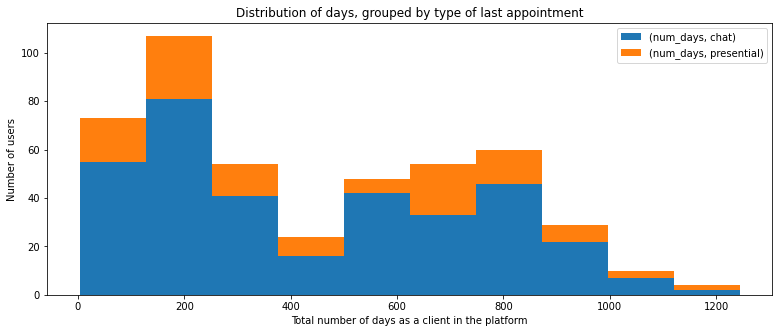

In [15]:
df[['num_days', 'channel']].pivot(columns='channel').plot(kind='hist', stacked=True, figsize=(13,5))

# Plot 
plt.legend()
plt.xlabel('Total number of days as a client in the platform')
plt.ylabel('Number of users')
plt.title('Distribution of days, grouped by type of last appointment')

In [16]:
model = ols('num_days ~ C(channel)', data=df)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               num_days   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2857
Date:                Tue, 07 Apr 2020   Prob (F-statistic):              0.593
Time:                        05:17:26   Log-Likelihood:                -3302.1
No. Observations:                 463   AIC:                             6608.
Df Residuals:                     461   BIC:                             6617.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  444.2174     16.338     27.188      0.000     412.110     476.324
C(channel)[T.presential]    17.2996     32.364      0.535      0.593     -46.299      80.899
==============================================================================
Omnibus:                      254.190   Durbin-Watson:                   3.567
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.810
Skew:                           0.343   Prob(JB):                     1.67e-08
Kurtosis:                       1.823   Cond. No.                         2.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Excluding erroneous data 

In [17]:
# filter out errors
df = df[df['type'] != 'first']
df.head()

,index,appt_id,user_id,appointment_date,channel,type,num_days
0,1,2,1,2010-10-29,chat,regular,126
1,6,7,2,2012-02-17,presential,regular,396
3,15,16,4,2012-07-05,chat,regular,621
5,26,27,6,2011-11-20,chat,regular,493
6,29,30,7,2010-10-10,chat,regular,194


Text(0.5, 1.0, 'Distribution of days, grouped by type of last appointment')

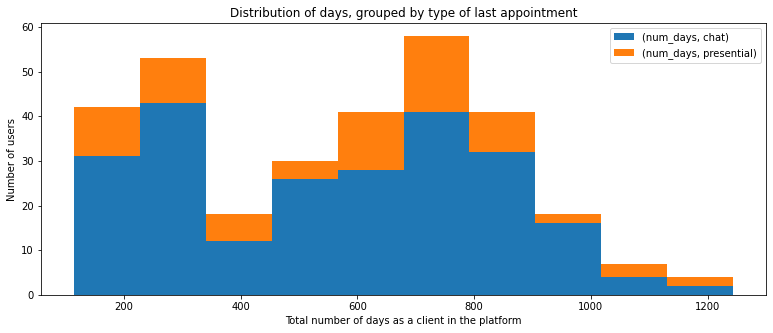

In [18]:
ax = df[['num_days', 'channel']].pivot(columns='channel').plot(kind='hist', stacked=True, figsize=(13,5))

# Plot 
plt.legend()
plt.xlabel('Total number of days as a client in the platform')
plt.ylabel('Number of users')
plt.title('Distribution of days, grouped by type of last appointment')

In [19]:
model = ols('num_days ~ C(channel)', data=df)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               num_days   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.4965
Date:                Tue, 07 Apr 2020   Prob (F-statistic):              0.482
Time:                        05:17:27   Log-Likelihood:                -2189.2
No. Observations:                 312   AIC:                             4382.
Df Residuals:                     310   BIC:                             4390.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  559.8383     17.657     31.707      0.000     525.096     594.581
C(channel)[T.presential]    25.0448     35.542      0.705      0.482     -44.890      94.980
==============================================================================
Omnibus:                      100.256   Durbin-Watson:                   2.758
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.985
Skew:                           0.020   Prob(JB):                     0.000338
Kurtosis:                       1.892   Cond. No.                         2.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""